In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv(r'D:\Build-With-Ai\Week-1\AQI_Data.csv')
df.head()

,T,TM,Tm,SLP,H,VV,V,VM,PM 2.5
0,7.4,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,7.8,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,6.7,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,8.6,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,12.4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [3]:
df.shape

(1093, 9)

<Axes: >

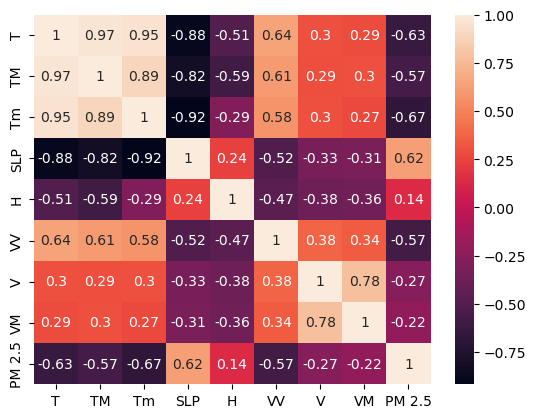

In [4]:
import seaborn as sns
sns.heatmap(df.corr(), annot = True)

In [5]:
data = df.copy()

In [6]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

cols_to_pca = ['T', 'TM', 'Tm']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[cols_to_pca])

pca = PCA(n_components=1)
data['T_PCA'] = pca.fit_transform(scaled_data)

data.drop(columns=cols_to_pca, inplace=True)

print(f"Explained Variance by PC1: {pca.explained_variance_ratio_[0]:.2f}")

Explained Variance by PC1: 0.96


<Axes: >

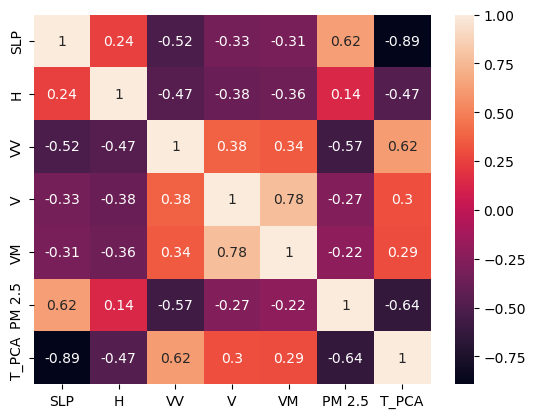

In [7]:
sns.heatmap(data.corr(), annot = True)

In [8]:
cols_to_pca = ['V', 'VM']
scaled_data = scaler.fit_transform(data[cols_to_pca])

pca = PCA(n_components=1)
data['V_PCA'] = pca.fit_transform(scaled_data)

data.drop(columns=cols_to_pca, inplace=True)

print(f"Explained Variance by PC1: {pca.explained_variance_ratio_[0]:.2f}")

Explained Variance by PC1: 0.89


<Axes: >

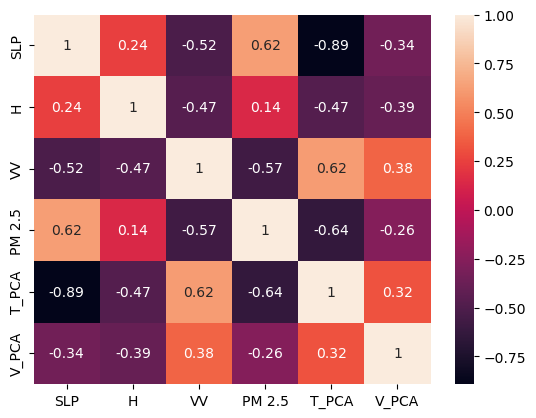

In [9]:
sns.heatmap(data.corr(), annot = True)

In [10]:
data.head()

,SLP,H,VV,PM 2.5,T_PCA,V_PCA
0,1017.6,93.0,0.5,219.720833,-4.585909,-1.071493
1,1018.5,87.0,0.6,182.187500,-4.334798,-0.888522
2,1019.4,82.0,0.6,154.037500,-4.517439,-0.814853
3,1018.7,72.0,0.8,223.208333,-4.113632,0.712481
4,1017.3,61.0,1.3,200.645833,-3.256593,0.977859


In [11]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [12]:
data_scaled.head()

,SLP,H,VV,PM 2.5,T_PCA,V_PCA
0,1.264733,1.915694,-2.011660,1.310359,-2.704211,-0.804086
1,1.384321,1.533592,-1.877826,0.865794,-2.556136,-0.666778
2,1.503910,1.215174,-1.877826,0.532371,-2.663835,-0.611495
3,1.410897,0.578338,-1.610160,1.351667,-2.425719,0.534671
4,1.224870,-0.122182,-0.940995,1.084425,-1.920342,0.733820


In [13]:
data_scaled.isnull().sum()

SLP       0
H         0
VV        0
PM 2.5    1
T_PCA     0
V_PCA     0
dtype: int64

In [14]:
data_scaled.dropna(inplace = True)

In [15]:
data_new = data_scaled.drop('T_PCA', axis = 1)

<Axes: >

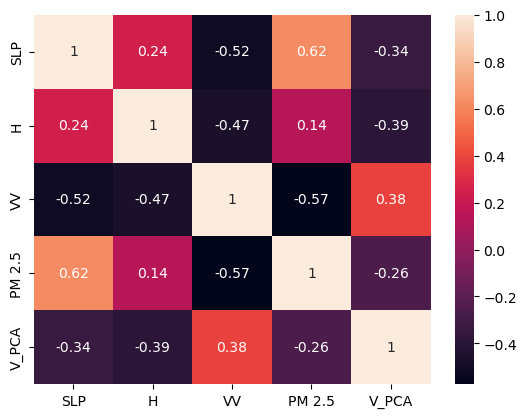

In [16]:
sns.heatmap(data_new.corr(), annot = True)

In [17]:
df.dropna(inplace = True)

In [18]:
data.dropna(inplace = True)

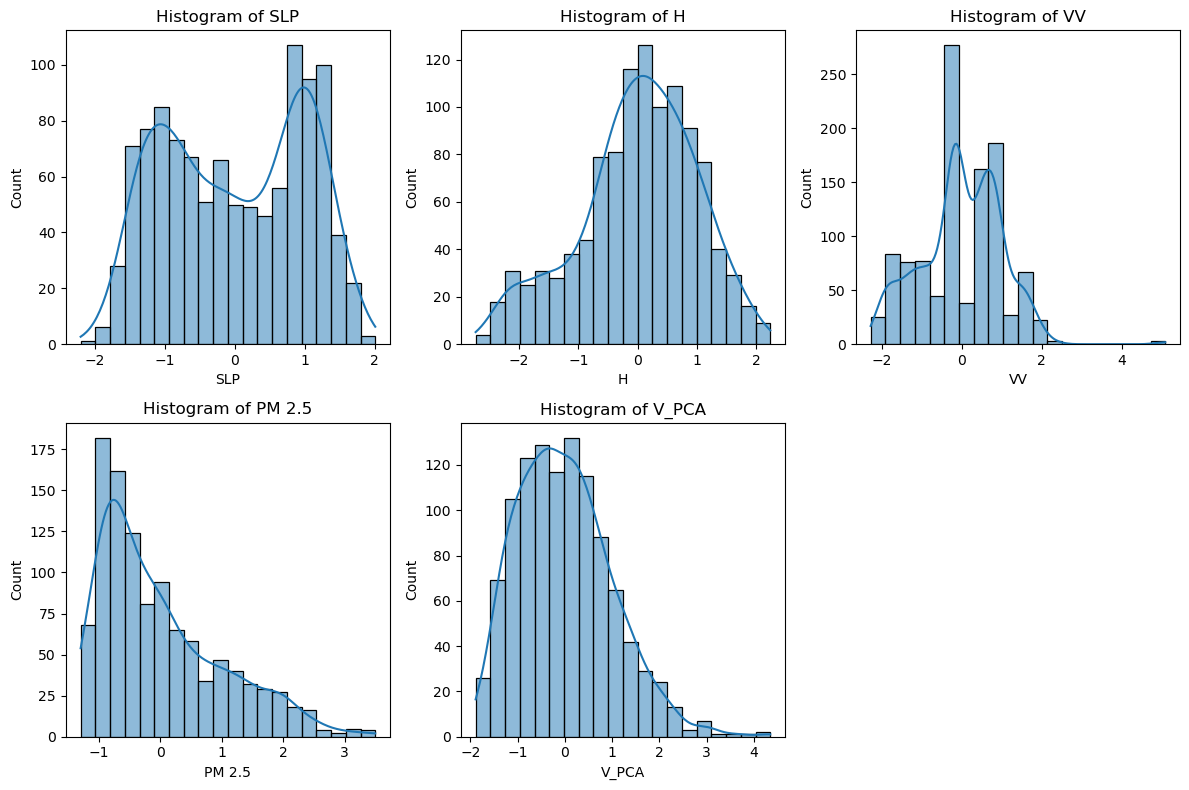

In [21]:
import matplotlib.pyplot as plt

def plot_histograms(df, bins=20, figsize=(12, 8)):
    num_cols = df.select_dtypes(include=['number']).columns
    num_cols_count = len(num_cols)
    
    if num_cols_count == 0:
        print("No numerical columns found in the DataFrame.")
        return
   
    rows = (num_cols_count + 2) // 3
    fig, axes = plt.subplots(rows, min(3, num_cols_count), figsize=figsize)
    
    if num_cols_count == 1:
        axes = [axes]
    elif rows == 1:
        axes = axes.reshape(1, -1)
    
    axes = axes.flatten()
    
    for i, col in enumerate(num_cols):
        sns.histplot(df[col], bins=bins, kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of {col}')
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
    
plot_histograms(data_new)

In [25]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
data_scaled = pd.DataFrame(ss.fit_transform(data_new), columns = data_new.columns)

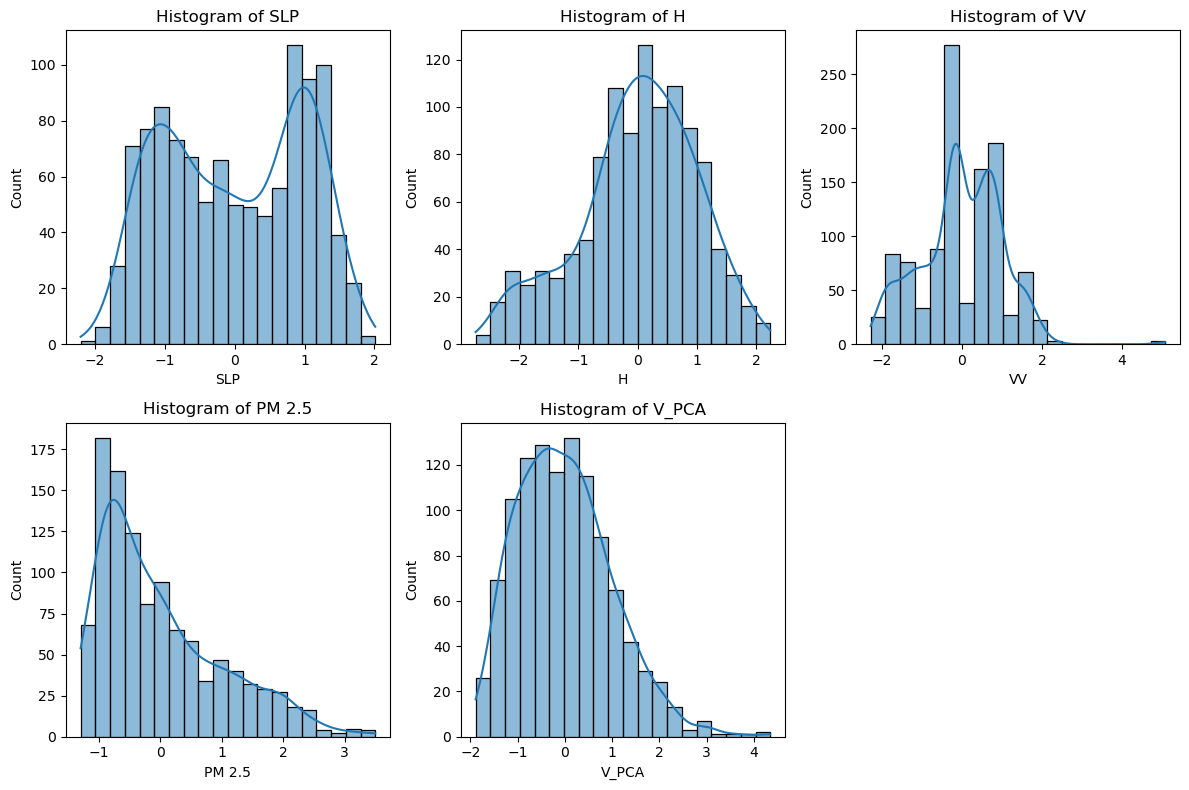

In [26]:
plot_histograms(data_scaled)

In [30]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

quantile_transformer = QuantileTransformer(output_distribution="normal", random_state=42)
data_scaled["VV"] = quantile_transformer.fit_transform(data_scaled[["VV"]])

boxcox_transformer = PowerTransformer(method="yeo-johnson")
data_scaled["PM 2.5"] = boxcox_transformer.fit_transform(data_scaled[["PM 2.5"]])

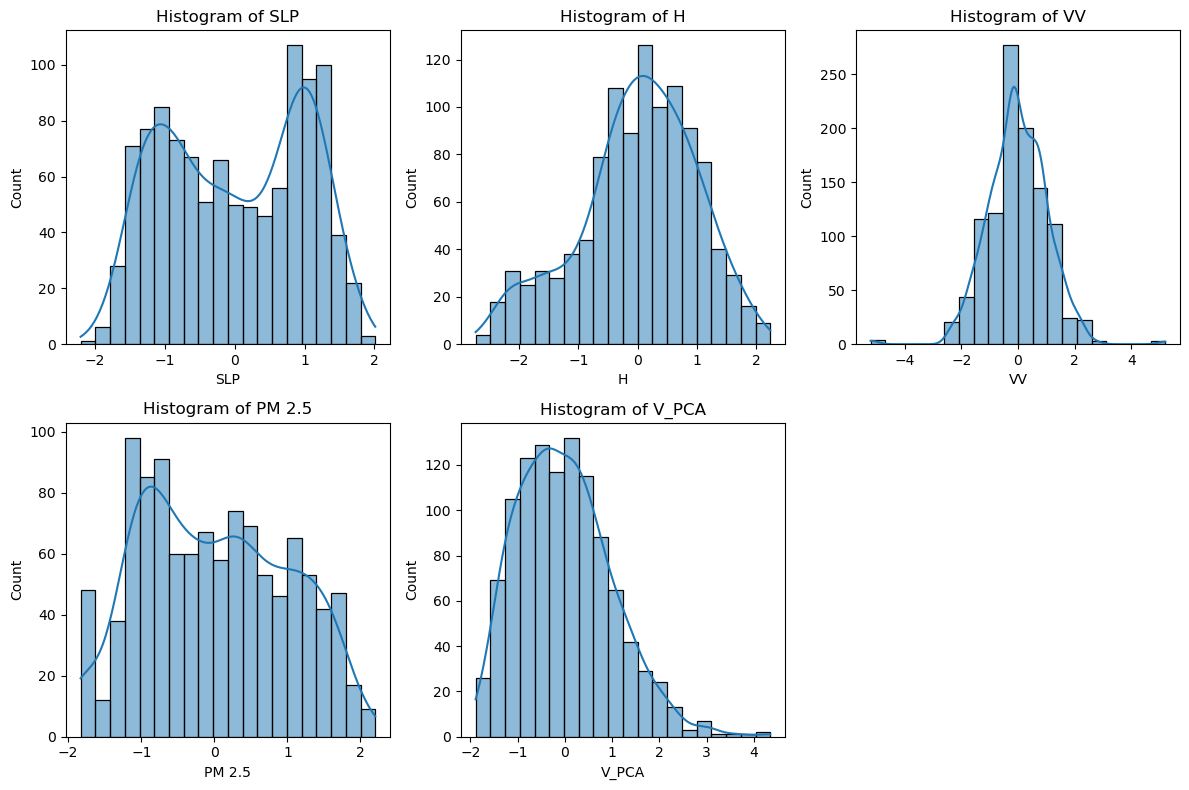

In [31]:
plot_histograms(data_scaled)

Text(0, 0.5, 'Values')

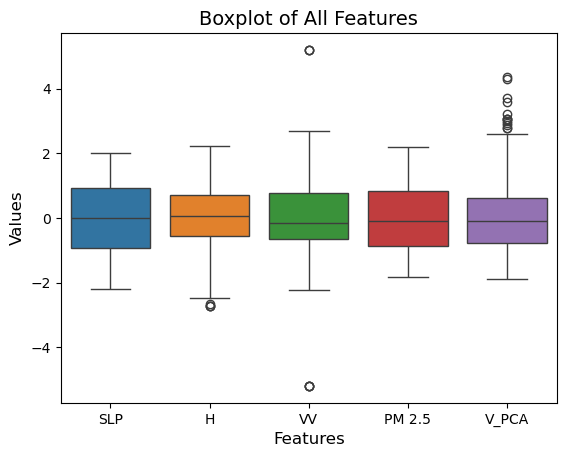

In [32]:
sns.boxplot(data=data_scaled)

plt.title("Boxplot of All Features", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Values", fontsize=12)

In [33]:
def remove_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1       

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_clean = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]
    
    return df_clean

data_cleaned = remove_outliers_iqr(data_scaled)

Text(0, 0.5, 'Values')

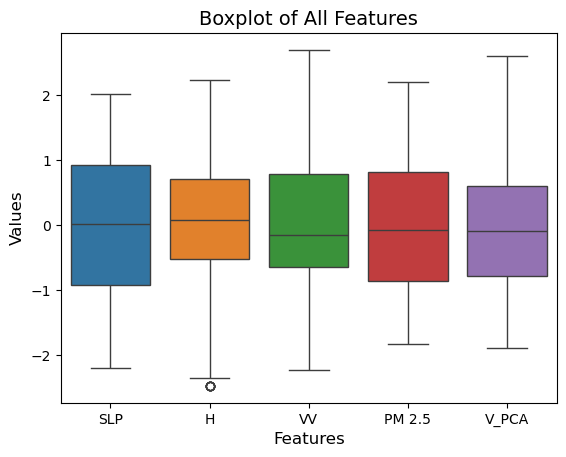

In [34]:
sns.boxplot(data=data_cleaned)

plt.title("Boxplot of All Features", fontsize=14)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Values", fontsize=12)

In [35]:
from sklearn.model_selection import train_test_split

X = data_cleaned.drop("PM 2.5", axis = 1)
y = data_cleaned["PM 2.5"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [36]:
import optuna
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def objective(trial):
    fit_intercept = trial.suggest_categorical('fit_intercept', [True, False])
    
    model = LinearRegression(fit_intercept=fit_intercept)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    return mae

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

print(f"Best hyperparameters: {study.best_params}")

best_params = study.best_params
best_model = LinearRegression(fit_intercept=best_params['fit_intercept'])
best_model.fit(X_train, y_train)

y_pred_best = best_model.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Mean Absolute Error: {mae_best}")
print(f"Mean Squared Error: {mse_best}")
print(f"Root Mean Squared Error: {rmse_best}")
print(f"R-squared: {r2_best}")

[I 2025-02-07 22:19:57,252] A new study created in memory with name: no-name-52b5fa3a-bc76-404a-a911-78bf3ae95d11
[I 2025-02-07 22:19:57,289] Trial 0 finished with value: 0.5146033627254593 and parameters: {'fit_intercept': True}. Best is trial 0 with value: 0.5146033627254593.
[I 2025-02-07 22:19:57,297] Trial 1 finished with value: 0.5146033627254593 and parameters: {'fit_intercept': True}. Best is trial 0 with value: 0.5146033627254593.
[I 2025-02-07 22:19:57,305] Trial 2 finished with value: 0.5146033627254593 and parameters: {'fit_intercept': True}. Best is trial 0 with value: 0.5146033627254593.
[I 2025-02-07 22:19:57,314] Trial 3 finished with value: 0.514769574936011 and parameters: {'fit_intercept': False}. Best is trial 0 with value: 0.5146033627254593.
[I 2025-02-07 22:19:57,324] Trial 4 finished with value: 0.514769574936011 and parameters: {'fit_intercept': False}. Best is trial 0 with value: 0.5146033627254593.
[I 2025-02-07 22:19:57,333] Trial 5 finished with value: 0.51

Best hyperparameters: {'fit_intercept': True}
Mean Absolute Error: 0.5146033627254593
Mean Squared Error: 0.4641107263372906
Root Mean Squared Error: 0.6812567257189397
R-squared: 0.49941934112832287


In [37]:
import optuna
from sklearn.linear_model import SGDRegressor

def objective(trial):
    alpha = trial.suggest_loguniform('alpha', 1e-5, 1e-1)
    learning_rate = trial.suggest_categorical('learning_rate', ['constant', 'optimal', 'invscaling', 'adaptive'])
    max_iter = trial.suggest_int('max_iter', 100, 1000)
    tol = trial.suggest_loguniform('tol', 1e-5, 1e-2)
    
    model = SGDRegressor(alpha=alpha, learning_rate=learning_rate, max_iter=max_iter, tol=tol)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    return mae

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

print(f"Best hyperparameters: {study.best_params}")

best_params = study.best_params
best_model = SGDRegressor(alpha=best_params['alpha'], 
                          learning_rate=best_params['learning_rate'], 
                          max_iter=best_params['max_iter'], 
                          tol=best_params['tol'])
best_model.fit(X_train, y_train)

y_pred_best = best_model.predict(X_test)

mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
rmse_best = np.sqrt(mse_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"Mean Absolute Error: {mae_best}")
print(f"Mean Squared Error: {mse_best}")
print(f"Root Mean Squared Error: {rmse_best}")
print(f"R-squared: {r2_best}")

[I 2025-02-07 22:20:13,541] A new study created in memory with name: no-name-06ed6120-4033-4c32-bea9-e3ffb8fc1c32
C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\1828347032.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  alpha = trial.suggest_loguniform('alpha', 1e-5, 1e-1)
C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\1828347032.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  tol = trial.suggest_loguniform('tol', 1e-5, 1e-2)
[I 2025-02-07 22:20:13,563] Trial 0 finished with value: 0.5189080360280328 and parameters: {'alpha': 0.037625275095065615, 'learning_rate': 'adaptive', 'max_iter': 451, 'tol': 2.649042427950201e-05}. Best is trial 0 with value: 0.518

Best hyperparameters: {'alpha': 0.00025391087141297383, 'learning_rate': 'constant', 'max_iter': 673, 'tol': 4.4763504095192995e-05}
Mean Absolute Error: 0.5246655537598834
Mean Squared Error: 0.48777485817545485
Root Mean Squared Error: 0.6984088044801947
R-squared: 0.47389567611704364


In [38]:
from sklearn.linear_model import Lasso, ElasticNet, HuberRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [40]:
from sklearn.model_selection import cross_val_score

def objective(trial, model_name):
    params = {}

    if model_name == "Lasso":
        params = {"alpha": trial.suggest_loguniform("alpha", 1e-4, 1.0)}
        model = Lasso(**params)

    elif model_name == "ElasticNet":
        params = {
            "alpha": trial.suggest_loguniform("alpha", 1e-4, 1.0),
            "l1_ratio": trial.suggest_uniform("l1_ratio", 0.1, 0.9),
        }
        model = ElasticNet(**params)

    elif model_name == "HuberRegressor":
        params = {"epsilon": trial.suggest_uniform("epsilon", 1.1, 2.0)}
        model = HuberRegressor(**params)

    elif model_name == "SVR":
        params = {
            "C": trial.suggest_loguniform("C", 1e-2, 10),
            "kernel": trial.suggest_categorical("kernel", ["linear", "rbf", "poly"]),
        }
        model = SVR(**params)

    elif model_name == "DecisionTreeRegressor":
        params = {
            "max_depth": trial.suggest_int("max_depth", 2, 20),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
        }
        model = DecisionTreeRegressor(**params)

    elif model_name == "RandomForestRegressor":
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 50, 300),
            "max_depth": trial.suggest_int("max_depth", 2, 20),
        }
        model = RandomForestRegressor(**params)

    elif model_name == "ExtraTreesRegressor":
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 50, 300),
            "max_depth": trial.suggest_int("max_depth", 2, 20),
        }
        model = ExtraTreesRegressor(**params)

    elif model_name == "GradientBoostingRegressor":
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 50, 300),
            "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        }
        model = GradientBoostingRegressor(**params)

    elif model_name == "AdaBoostRegressor":
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 50, 300),
            "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 1.0),
        }
        model = AdaBoostRegressor(**params)

    elif model_name == "KNeighborsRegressor":
        params = {
            "n_neighbors": trial.suggest_int("n_neighbors", 2, 15),
            "weights": trial.suggest_categorical("weights", ["uniform", "distance"]),
        }
        model = KNeighborsRegressor(**params)

    elif model_name == "XGBRegressor":
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 50, 300),
            "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
            "max_depth": trial.suggest_int("max_depth", 2, 20),
        }
        model = XGBRegressor(**params)

    elif model_name == "LGBMRegressor":
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 50, 300),
            "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
            "num_leaves": trial.suggest_int("num_leaves", 20, 150),
        }
        model = LGBMRegressor(**params)

    elif model_name == "CatBoostRegressor":
        params = {
            "iterations": trial.suggest_int("iterations", 50, 300),
            "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
        }
        model = CatBoostRegressor(**params, verbose=0)

    return np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring="r2"))

best_models = {}

for model_name in [
    "Lasso", "ElasticNet", "HuberRegressor", "SVR", "DecisionTreeRegressor", "RandomForestRegressor",
    "ExtraTreesRegressor", "GradientBoostingRegressor", "AdaBoostRegressor", "KNeighborsRegressor",
    "XGBRegressor", "LGBMRegressor", "CatBoostRegressor"
]:
    study = optuna.create_study(direction="maximize")
    study.optimize(lambda trial: objective(trial, model_name), n_trials=20, timeout=300)
    
    best_models[model_name] = study.best_params
    print(f"Best parameters for {model_name}: {study.best_params}")

results = []

for name, params in best_models.items():
    model = eval(name)(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    cv_score = np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring="r2"))

    results.append([name, mae, mse, rmse, r2, cv_score, params])

metrics_df = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "RMSE", "R² Score", "Cross-Val R²", "Best Params"])
metrics_df.sort_values(by="R² Score", ascending=False, inplace=True)
print(metrics_df)


[I 2025-02-07 22:30:06,112] A new study created in memory with name: no-name-df2de07f-62f7-4852-85ac-61ad668000ad
C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params = {"alpha": trial.suggest_loguniform("alpha", 1e-4, 1.0)}
[I 2025-02-07 22:30:06,136] Trial 0 finished with value: 0.4692458389825343 and parameters: {'alpha': 0.0006722349628834597}. Best is trial 0 with value: 0.4692458389825343.
C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  params = {"alpha": trial.suggest_loguniform("alpha", 1e-4, 1.0)}
[I 2025-02-07 22:30:06,164] Trial 1 

Best parameters for Lasso: {'alpha': 0.00965242397131115}


C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "alpha": trial.suggest_loguniform("alpha", 1e-4, 1.0),
C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  "l1_ratio": trial.suggest_uniform("l1_ratio", 0.1, 0.9),
[I 2025-02-07 22:30:06,846] Trial 8 finished with value: 0.4698277753357757 and parameters: {'alpha': 0.006641059846410808, 'l1_ratio': 0.7863683333155086}. Best is trial 4 with value: 0.46999205481055084.
C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be

Best parameters for ElasticNet: {'alpha': 0.009304438541981562, 'l1_ratio': 0.8494629245944878}


[I 2025-02-07 22:30:07,344] Trial 5 finished with value: 0.462460668332104 and parameters: {'epsilon': 1.516494772795237}. Best is trial 4 with value: 0.4668535351720159.
C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  params = {"epsilon": trial.suggest_uniform("epsilon", 1.1, 2.0)}
[I 2025-02-07 22:30:07,376] Trial 6 finished with value: 0.4618788159744507 and parameters: {'epsilon': 1.4859161703803934}. Best is trial 4 with value: 0.4668535351720159.
C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:18: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  params = {"epsilon": trial.suggest_uniform("epsilon", 1.1, 2.0)}
[I 2025-02-07 

Best parameters for HuberRegressor: {'epsilon': 1.9931384231691447}


[I 2025-02-07 22:30:08,113] Trial 1 finished with value: 0.37205148943036337 and parameters: {'C': 0.017573461041698046, 'kernel': 'poly'}. Best is trial 0 with value: 0.6280335589829051.
C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C", 1e-2, 10),
[I 2025-02-07 22:30:08,212] Trial 2 finished with value: 0.5931840309698001 and parameters: {'C': 0.3368847754711306, 'kernel': 'rbf'}. Best is trial 0 with value: 0.6280335589829051.
C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:23: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "C": trial.suggest_loguniform("C",

Best parameters for SVR: {'C': 9.784264786497943, 'kernel': 'rbf'}


[I 2025-02-07 22:30:11,017] Trial 7 finished with value: 0.5028162837263206 and parameters: {'max_depth': 2, 'min_samples_split': 6}. Best is trial 2 with value: 0.6541466328591733.
[I 2025-02-07 22:30:11,042] Trial 8 finished with value: 0.6486066133852081 and parameters: {'max_depth': 7, 'min_samples_split': 4}. Best is trial 2 with value: 0.6541466328591733.
[I 2025-02-07 22:30:11,068] Trial 9 finished with value: 0.6458613912446503 and parameters: {'max_depth': 14, 'min_samples_split': 3}. Best is trial 2 with value: 0.6541466328591733.
[I 2025-02-07 22:30:11,101] Trial 10 finished with value: 0.6447830928705839 and parameters: {'max_depth': 15, 'min_samples_split': 9}. Best is trial 2 with value: 0.6541466328591733.
[I 2025-02-07 22:30:11,135] Trial 11 finished with value: 0.6571466371656729 and parameters: {'max_depth': 11, 'min_samples_split': 10}. Best is trial 11 with value: 0.6571466371656729.
[I 2025-02-07 22:30:11,168] Trial 12 finished with value: 0.6498241953970223 and pa

Best parameters for DecisionTreeRegressor: {'max_depth': 9, 'min_samples_split': 10}


[I 2025-02-07 22:30:14,237] Trial 0 finished with value: 0.7799991976185117 and parameters: {'n_estimators': 291, 'max_depth': 20}. Best is trial 0 with value: 0.7799991976185117.
[I 2025-02-07 22:30:16,596] Trial 1 finished with value: 0.7523483199199522 and parameters: {'n_estimators': 299, 'max_depth': 8}. Best is trial 0 with value: 0.7799991976185117.
[I 2025-02-07 22:30:18,292] Trial 2 finished with value: 0.7347628107456579 and parameters: {'n_estimators': 240, 'max_depth': 7}. Best is trial 0 with value: 0.7799991976185117.
[I 2025-02-07 22:30:19,765] Trial 3 finished with value: 0.7813276710734718 and parameters: {'n_estimators': 160, 'max_depth': 16}. Best is trial 3 with value: 0.7813276710734718.
[I 2025-02-07 22:30:22,006] Trial 4 finished with value: 0.779913991054429 and parameters: {'n_estimators': 248, 'max_depth': 14}. Best is trial 3 with value: 0.7813276710734718.
[I 2025-02-07 22:30:22,774] Trial 5 finished with value: 0.7690809914180256 and parameters: {'n_estimat

Best parameters for RandomForestRegressor: {'n_estimators': 135, 'max_depth': 17}


[I 2025-02-07 22:30:47,160] Trial 0 finished with value: 0.6535791153771144 and parameters: {'n_estimators': 123, 'max_depth': 6}. Best is trial 0 with value: 0.6535791153771144.
[I 2025-02-07 22:30:48,072] Trial 1 finished with value: 0.8185694291680786 and parameters: {'n_estimators': 160, 'max_depth': 16}. Best is trial 1 with value: 0.8185694291680786.
[I 2025-02-07 22:30:48,583] Trial 2 finished with value: 0.7004287627284953 and parameters: {'n_estimators': 135, 'max_depth': 7}. Best is trial 1 with value: 0.8185694291680786.
[I 2025-02-07 22:30:49,382] Trial 3 finished with value: 0.7371305796949275 and parameters: {'n_estimators': 203, 'max_depth': 8}. Best is trial 1 with value: 0.8185694291680786.
[I 2025-02-07 22:30:50,668] Trial 4 finished with value: 0.790632362170028 and parameters: {'n_estimators': 282, 'max_depth': 10}. Best is trial 1 with value: 0.8185694291680786.
[I 2025-02-07 22:30:52,017] Trial 5 finished with value: 0.8175071852691407 and parameters: {'n_estimato

Best parameters for ExtraTreesRegressor: {'n_estimators': 160, 'max_depth': 16}


[I 2025-02-07 22:31:07,511] Trial 0 finished with value: 0.7543387446446682 and parameters: {'n_estimators': 296, 'learning_rate': 0.1109949190955462}. Best is trial 0 with value: 0.7543387446446682.
C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:52: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
[I 2025-02-07 22:31:07,804] Trial 1 finished with value: 0.5449534591554481 and parameters: {'n_estimators': 76, 'learning_rate': 0.017378036137345506}. Best is trial 0 with value: 0.7543387446446682.
C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:52: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., l

Best parameters for GradientBoostingRegressor: {'n_estimators': 260, 'learning_rate': 0.15804198162749675}


[I 2025-02-07 22:31:23,025] Trial 0 finished with value: 0.5693699500060111 and parameters: {'n_estimators': 149, 'learning_rate': 0.02180097690044261}. Best is trial 0 with value: 0.5693699500060111.
C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:59: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 1.0),
[I 2025-02-07 22:31:23,344] Trial 1 finished with value: 0.5695540478888859 and parameters: {'n_estimators': 193, 'learning_rate': 0.6156837317225955}. Best is trial 1 with value: 0.5695540478888859.
C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:59: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., l

Best parameters for AdaBoostRegressor: {'n_estimators': 300, 'learning_rate': 0.04381683004710549}


[I 2025-02-07 22:31:43,318] Trial 8 finished with value: 0.7575571962557844 and parameters: {'n_neighbors': 3, 'weights': 'distance'}. Best is trial 4 with value: 0.7796753535047719.
[I 2025-02-07 22:31:43,363] Trial 9 finished with value: 0.6410891625956614 and parameters: {'n_neighbors': 8, 'weights': 'uniform'}. Best is trial 4 with value: 0.7796753535047719.
[I 2025-02-07 22:31:43,412] Trial 10 finished with value: 0.7796753535047719 and parameters: {'n_neighbors': 15, 'weights': 'distance'}. Best is trial 4 with value: 0.7796753535047719.
[I 2025-02-07 22:31:43,451] Trial 11 finished with value: 0.7796753535047719 and parameters: {'n_neighbors': 15, 'weights': 'distance'}. Best is trial 4 with value: 0.7796753535047719.
[I 2025-02-07 22:31:43,494] Trial 12 finished with value: 0.7796753535047719 and parameters: {'n_neighbors': 15, 'weights': 'distance'}. Best is trial 4 with value: 0.7796753535047719.
[I 2025-02-07 22:31:43,534] Trial 13 finished with value: 0.7815623115415148 and

Best parameters for KNeighborsRegressor: {'n_neighbors': 10, 'weights': 'distance'}


[I 2025-02-07 22:31:45,447] Trial 0 finished with value: 0.7666115679398349 and parameters: {'n_estimators': 146, 'learning_rate': 0.024236767064997763, 'max_depth': 7}. Best is trial 0 with value: 0.7666115679398349.
C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:73: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
[I 2025-02-07 22:31:45,837] Trial 1 finished with value: 0.7663125255141341 and parameters: {'n_estimators': 230, 'learning_rate': 0.1993473267520347, 'max_depth': 5}. Best is trial 0 with value: 0.7666115679398349.
C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:73: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag

Best parameters for XGBRegressor: {'n_estimators': 178, 'learning_rate': 0.056462583531274785, 'max_depth': 7}
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 373
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 4
[LightGBM] [Info] Start training from score 0.015038
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

[I 2025-02-07 22:32:03,427] Trial 0 finished with value: 0.6010740215981576 and parameters: {'n_estimators': 105, 'learning_rate': 0.013156205543544014, 'num_leaves': 43}. Best is trial 0 with value: 0.6010740215981576.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 379
[LightGBM] [Info] Number of data points in the train set: 641, number of used features: 4
[LightGBM] [Info] Start training from score 0.042650
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:81: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
[I 2025-02-07 22:32:03,732] Trial 1 finished with value: 0.7347714264957069 and parameters: {'n_estimators': 197, 'learning_rate': 0.03279387347397499, 'num_leaves': 76}. Best is trial 1 with value: 0.7347714264957069.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:81: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-07 22:32:04,003] Trial 2 finished with value: 0.7324642701058511 and parameters: {'n_estimators': 213, 'learning_rate': 0.031460553720194497, 'num_leaves': 36}. Best is trial 1 with value: 0.7347714264957069.
C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:81: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 373
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 4
[LightGBM] [Info] Start training from score 0.015038
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2025-02-07 22:32:04,337] Trial 3 finished with value: 0.6965867961466758 and parameters: {'n_estimators': 286, 'learning_rate': 0.011385667578455126, 'num_leaves': 76}. Best is trial 1 with value: 0.7347714264957069.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:81: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
[I 2025-02-07 22:32:04,476] Trial 4 finished with value: 0.6877720668636856 and parameters: {'n_estimators': 98, 'learning_rate': 0.029021979554235446, 'num_leaves': 135}. Best is trial 1 with value: 0.7347714264957069.
C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:81: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000041 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 379
[LightGBM] [Info] Number of data points in the train set: 641, number of used features: 4
[LightGBM] [Info] Start training from score 0.042650
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2025-02-07 22:32:04,697] Trial 5 finished with value: 0.708769200649824 and parameters: {'n_estimators': 141, 'learning_rate': 0.029360619121602826, 'num_leaves': 121}. Best is trial 1 with value: 0.7347714264957069.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:81: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
[I 2025-02-07 22:32:04,918] Trial 6 finished with value: 0.7110563022673271 and parameters: {'n_estimators': 178, 'learning_rate': 0.023266283909197234, 'num_leaves': 22}. Best is trial 1 with value: 0.7347714264957069.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000048 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 379
[LightGBM] [Info] Number of data points in the train set: 641, number of used features: 4
[LightGBM] [Info] Start training from score 0.042650
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 376
[LightGBM] [Info] Number of data points in the train set: 641, number of used features: 4
[LightGBM] [Info] Start training from score -0.028617
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 373
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 4
[LightGBM] [Info] Start training from 

C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:81: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
[I 2025-02-07 22:32:05,145] Trial 7 finished with value: 0.663546634893387 and parameters: {'n_estimators': 128, 'learning_rate': 0.01718923223223954, 'num_leaves': 73}. Best is trial 1 with value: 0.7347714264957069.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:81: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
[I 2025-02-07 22:32:05,278] Trial 8 finished with value: 0.7517697459479453 and parameters: {'n_estimators': 78, 'learning_rate': 0.13152614899966797, 'num_leaves': 53}. Best is trial 8 with value: 0.7517697459479453.
C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:81: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 376
[LightGBM] [Info] Number of data points in the train set: 641, number of used features: 4
[LightGBM] [Info] Start training from score -0.028617
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[I 2025-02-07 22:32:05,550] Trial 9 finished with value: 0.7610913447068697 and parameters: {'n_estimators': 212, 'learning_rate': 0.07612244117969601, 'num_leaves': 55}. Best is trial 9 with value: 0.7610913447068697.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:81: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-07 22:32:05,905] Trial 10 finished with value: 0.7661912723691297 and parameters: {'n_estimators': 265, 'learning_rate': 0.10408163264847053, 'num_leaves': 103}. Best is trial 10 with value: 0.7661912723691297.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:81: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
[I 2025-02-07 22:32:06,280] Trial 11 finished with value: 0.7590724745166098 and parameters: {'n_estimators': 261, 'learning_rate': 0.0964900133770386, 'num_leaves': 101}. Best is trial 10 with value: 0.7661912723691297.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:81: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000047 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 373
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 4
[LightGBM] [Info] Start training from score 0.015038
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[I 2025-02-07 22:32:06,618] Trial 12 finished with value: 0.7587169977245118 and parameters: {'n_estimators': 244, 'learning_rate': 0.2576451999086655, 'num_leaves': 103}. Best is trial 10 with value: 0.7661912723691297.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:81: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-07 22:32:06,949] Trial 13 finished with value: 0.7676366923865237 and parameters: {'n_estimators': 234, 'learning_rate': 0.07418501906237235, 'num_leaves': 100}. Best is trial 13 with value: 0.7676366923865237.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:81: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 366
[LightGBM] [Info] Number of data points in the train set: 641, number of used features: 4
[LightGBM] [Info] Start training from score -0.006295
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[I 2025-02-07 22:32:07,334] Trial 14 finished with value: 0.7628880363459126 and parameters: {'n_estimators': 284, 'learning_rate': 0.1710059030453075, 'num_leaves': 104}. Best is trial 13 with value: 0.7676366923865237.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 373
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 4
[LightGBM] [Info] Start training from score 0.015038
[LightGBM] [Warning] No further splits with positive gain, bes

C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:81: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
[I 2025-02-07 22:32:07,680] Trial 15 finished with value: 0.7573755612961073 and parameters: {'n_estimators': 249, 'learning_rate': 0.0547338198930031, 'num_leaves': 145}. Best is trial 13 with value: 0.7676366923865237.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:81: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 382
[LightGBM] [Info] Number of data points in the train set: 641, number of used features: 4
[LightGBM] [Info] Start training from score -0.035697
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[I 2025-02-07 22:32:08,014] Trial 16 finished with value: 0.7582224355006131 and parameters: {'n_estimators': 237, 'learning_rate': 0.055787501692580635, 'num_leaves': 118}. Best is trial 13 with value: 0.7676366923865237.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:81: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-02-07 22:32:08,457] Trial 17 finished with value: 0.7637402420249199 and parameters: {'n_estimators': 292, 'learning_rate': 0.17309865469886765, 'num_leaves': 94}. Best is trial 13 with value: 0.7676366923865237.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 376
[LightGBM] [Info] Number of data points in the train set: 641, number of used features: 4
[LightGBM] [Info] Start training from score -0.028617
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:81: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
[I 2025-02-07 22:32:08,680] Trial 18 finished with value: 0.740740951423945 and parameters: {'n_estimators': 152, 'learning_rate': 0.05270882667827903, 'num_leaves': 121}. Best is trial 13 with value: 0.7676366923865237.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:81: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
[I 2025-02-07 22:32:08,980] Trial 19 finished with value: 0.7645896834201881 and parameters: {'n_estimators': 222, 'learning_rate': 0.09444808407718801, 'num_leaves': 87}. Best is trial 13 with value: 0.7676366923865237.
[I 2025-02-07 22:32:08,980] A new study created in memory with name: no-name-2d42e896-8e80-4cc4-afe4-d520afe52186


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 366
[LightGBM] [Info] Number of data points in the train set: 641, number of used features: 4
[LightGBM] [Info] Start training from score -0.006295
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:89: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
[I 2025-02-07 22:32:10,161] Trial 0 finished with value: 0.6373119558130889 and parameters: {'iterations': 197, 'learning_rate': 0.017452090839784926}. Best is trial 0 with value: 0.6373119558130889.
C:\Users\Akshat\AppData\Local\Temp\ipykernel_4832\809777536.py:89: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  "learning_rate": trial.suggest_loguniform("learning_rate", 0.01, 0.3),
[I 2025-02-07 22:32:11,440] Trial 1 finished with value: 0.779711078846763 and parameters: {'iterations': 266,

Best parameters for CatBoostRegressor: {'iterations': 295, 'learning_rate': 0.1501796624351403}
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 421
[LightGBM] [Info] Number of data points in the train set: 801, number of used features: 4
[LightGBM] [Info] Start training from score -0.002590
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w